In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
athlete = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

In [3]:
athlete.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
athlete.shape

(271116, 15)

In [6]:
noc.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [8]:
noc.shape

(230, 3)

In [9]:
df = pd.merge(athlete, noc, on='NOC', how='left')
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [74]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [10]:
df['Age'].fillna(value=df['Age'].mean(),inplace=True)

In [11]:
df['Height'].fillna(value=df['Age'].mean(),inplace=True)

In [12]:
df['Weight'].fillna(value=df['Age'].mean(),inplace=True)

In [13]:
df['region'].fillna(value="Unknown Region",inplace=True)

In [16]:
df.drop(["notes"],axis=1,inplace=True)

In [14]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,25.556898,142.096605,60.232620,1978.378480
std,39022.286345,6.280857,62.929746,22.829172,29.877632
min,1.000000,10.000000,25.556898,25.000000,1896.000000
25%,34643.000000,22.000000,157.000000,47.000000,1960.000000
50%,68205.000000,25.000000,171.000000,64.000000,1988.000000
75%,102097.250000,28.000000,180.000000,75.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<AxesSubplot:title={'center':'Heatmap visualizing null values'}>

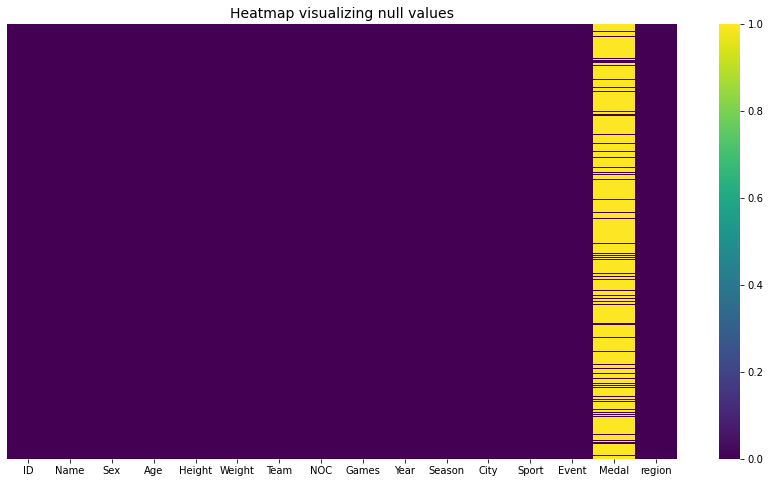

In [17]:
plt.subplots(figsize= (15, 8))
plt.title( "Heatmap visualizing null values" , size = 14 )
sns.heatmap(df.isnull(),yticklabels=False, cmap='viridis')

Here in above result we can see the heatmap visualization of all the null values in Height, Weight & region are successfully replaced with mean value & for notes while notes column is dropped. 

Lets create the dataframe where a medal is won by an athlete. 

In [18]:
medals = df[df['Medal'].notnull()]
medals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
3,4,Edgar Lindenau Aabye,M,34.0,25.556898,25.556898,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
37,15,Arvo Ossian Aaltonen,M,30.0,25.556898,25.556898,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
38,15,Arvo Ossian Aaltonen,M,30.0,25.556898,25.556898,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.000000,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
41,17,Paavo Johannes Aaltonen,M,28.0,175.000000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


In [19]:
medals.describe()

,ID,Age,Height,Weight,Year
count,39783.000000,39783.000000,39783.000000,39783.000000,39783.000000
mean,69407.051806,25.918399,144.272431,62.467110,1973.943845
std,38849.980737,5.859573,63.591268,24.286704,33.822857
min,4.000000,10.000000,25.556898,25.556898,1896.000000
25%,36494.000000,22.000000,159.000000,48.000000,1952.000000
50%,68990.000000,25.000000,173.000000,67.000000,1984.000000
75%,103461.500000,29.000000,183.000000,79.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


In this we removed the rows in medal column where it carried null values. And now we have new dataframe called medals - where there are not null value present.

<AxesSubplot:title={'center':'Heatmap visualizing null values'}>

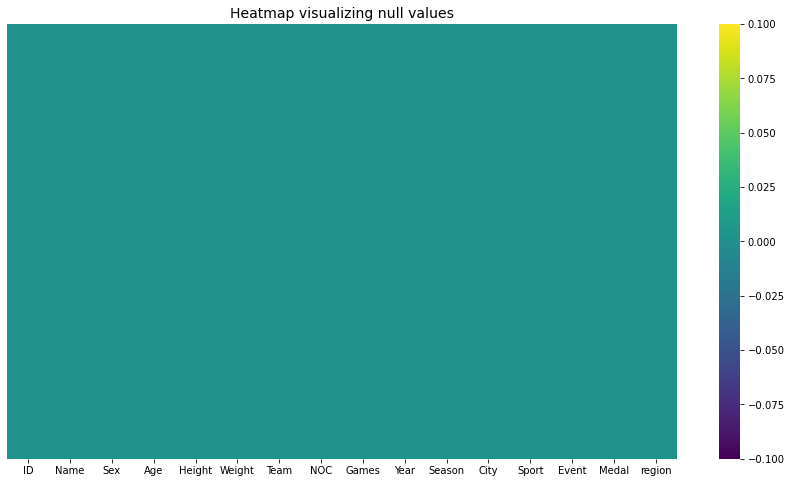

In [20]:
plt.subplots(figsize= (15, 8))
plt.title( "Heatmap visualizing null values" , size = 14 )
sns.heatmap(medals.isnull(),yticklabels=False, cmap='viridis')

Now let's do Basic Exploration :
1. Top 10 countries to win most gold medals at summer olympics ?
2. Top 10 countries to win most silver medals at summer olympics ?
3. Top 10 countries to win most bronze medals at summer olympics ?
4. 10 Most decorated olmypic athlete of all time in summer season ?
5. 10 most decorated olmypic athlete of all time in winter season ?
6. In which all cities have been summer/winter olmypics been hosted so far ?

Let's explore which countries have won maximum gold medals at summer olympics

In [21]:
summerGold = medals[(medals['Season'] == 'Summer') & (medals['Medal'] == 'Gold')]
summerGold['Season'].unique()

array(['Summer'], dtype=object)

In [22]:
GoldMedalCountries = summerGold['region'].value_counts().reset_index(name='Gold Medal').head(10)
GoldMedalCountries

,index,Gold Medal
0,USA,2472
1,Russia,1220
2,Germany,1075
3,UK,636
4,Italy,518
5,France,465
6,Hungary,432
7,Australia,362
8,Sweden,354
9,China,335


Text(0.5, 0, 'Country')

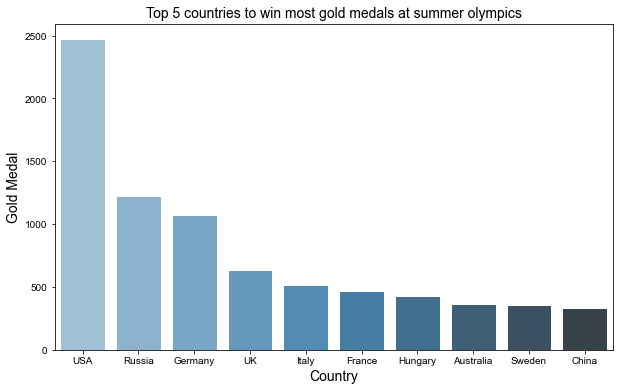

In [23]:
plt.subplots(figsize= (10, 6))
sns.set_theme(style="whitegrid")
gx = sns.barplot(x='index',y='Gold Medal',data=GoldMedalCountries,   palette="Blues_d")
plt.title('Top 5 countries to win most gold medals at summer olympics' , size = 14 )
plt.ylabel( "Gold Medal" , size = 14 )
plt.xlabel( "Country" , size = 14 )

Following are top 5 sports where USA has won Gold medals

In [24]:
USAGold = summerGold[summerGold['region']== 'USA']
USAGoldSport = USAGold['Sport'].value_counts().reset_index(name='Medal').head(5) 
USAGoldSport

,index,Medal
0,Swimming,649
1,Athletics,542
2,Basketball,281
3,Rowing,186
4,Shooting,117


Text(0.5, 0, 'Gold Medal')

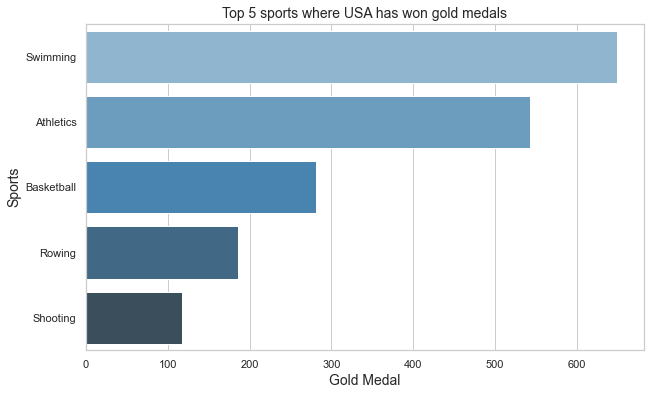

In [25]:
plt.subplots(figsize= (10, 6))
sns.set_theme(style="whitegrid")
tx = sns.barplot(x='Medal',y='index',data=USAGoldSport,   palette="Blues_d")
plt.title('Top 5 sports where USA has won gold medals' , size = 14 )
plt.ylabel( "Sports" , size = 14 )
plt.xlabel( "Gold Medal" , size = 14 )

Now let's search for top 5 events where USA has won gold medal.
In below achieved results we can see that United States has won 186 gold medals at Basketball Men event. but 186 is a huge number so let's explore it much deeper & let's try to get understanding of it by verfiying how medals are counted. Like is medal of each team member counted in United State's total gold medal tally or by an event.

In [26]:
USAGold = summerGold[summerGold['region']== 'USA']
USAGold['Event'].value_counts().reset_index(name='Medal').head(5) 

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,108
4,Basketball Women's Basketball,95


Here we can verify that medal of each team player is counted in total medal tally of United States. But now wonder how many medals have United States team has won in Basketball Men Event ? let's find it out

In [28]:
USABasketball = USAGold[USAGold['Event'] == "Basketball Men's Basketball"]
USABasketball.sort_values('Year').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
109529,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA
143383,71965,Frank John Lubin,M,26.0,200.0,113.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA
161770,81220,"Arthur Owen ""Art"" Mollner",M,23.0,183.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA
79052,40143,"John Haskell ""Tex"" Gibbons",M,28.0,185.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA
189347,95095,"Donald Arthur ""Don"" Piper",M,25.0,180.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA


Intersting outcomes - USA has won gold medal in Baskketball Men's Event continuously from year 1936 to 1968 - which is 7 times gold medal continuously

In [29]:
USABasketball.groupby('Year').first()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region
Year,,,,,,,,,,,,,,,
1936,7396,"Samuel J. ""Sam"" Balter, Jr.",M,26.0,178.0,68.0,United States,USA,1936 Summer,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA
1948,7881,"Clifford Eugene ""Cliff"" Barker",M,27.0,188.0,84.0,United States,USA,1948 Summer,Summer,London,Basketball,Basketball Men's Basketball,Gold,USA
1952,13302,"Ronald Yngve ""Ron"" Bontemps",M,25.0,188.0,79.0,United States,USA,1952 Summer,Summer,Helsinki,Basketball,Basketball Men's Basketball,Gold,USA
1956,14153,"Richard James ""Dick"" Boushka",M,22.0,195.0,95.0,United States,USA,1956 Summer,Summer,Melbourne,Basketball,Basketball Men's Basketball,Gold,USA
1960,5212,Jay Joseph Hoyland Arnette,M,21.0,188.0,79.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold,USA
1964,7958,"Velvet James ""Jim"" Barnes",M,23.0,201.0,109.0,United States,USA,1964 Summer,Summer,Tokyo,Basketball,Basketball Men's Basketball,Gold,USA
1968,8104,"Michael Thomas ""Mike"" Barrett",M,25.0,188.0,73.0,United States,USA,1968 Summer,Summer,Mexico City,Basketball,Basketball Men's Basketball,Gold,USA
1976,5173,"Michel Taylor ""Tate"" Armstrong",M,20.0,190.0,77.0,United States,USA,1976 Summer,Summer,Montreal,Basketball,Basketball Men's Basketball,Gold,USA
1984,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold,USA


Let's explore which countries have won maximum silver medals at summer olympics

In [30]:
summerSilver = medals[(medals['Season'] == 'Summer') & (medals['Medal'] == 'Silver')]
SilverMedalCountries = summerSilver['region'].value_counts().reset_index(name='Silver Medal').head(10)
SilverMedalCountries

,index,Silver Medal
0,USA,1333
1,Germany,987
2,Russia,974
3,UK,729
4,France,575
5,Italy,474
6,Australia,456
7,Sweden,396
8,Hungary,328
9,China,319


Text(0.5, 0, 'Country')

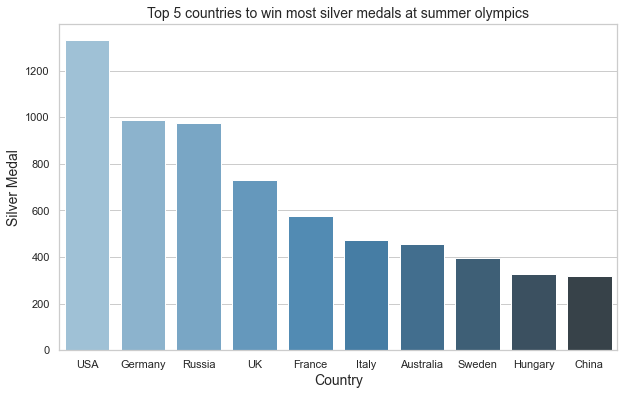

In [31]:
plt.subplots(figsize= (10, 6))
sns.set_theme(style="whitegrid")
sx=sns.barplot(x='index',y='Silver Medal',data=SilverMedalCountries,   palette="Blues_d")
plt.title('Top 5 countries to win most silver medals at summer olympics' , size = 14 )
plt.ylabel( "Silver Medal" , size = 14 )
plt.xlabel( "Country" , size = 14 )

Let's explore which countries have won maximum bronze medals at summer olympics

In [32]:
summerBronze = medals[(medals['Season'] == 'Summer') & (medals['Medal'] == 'Bronze')]
BronzeMedalCountries = summerBronze['region'].value_counts().reset_index(name='Bronze Medal').head(10)
BronzeMedalCountries

,index,Bronze Medal
0,USA,1197
1,Germany,1064
2,Russia,994
3,UK,620
4,France,587
5,Australia,515
6,Italy,454
7,Netherlands,371
8,Hungary,363
9,Sweden,358


Text(0.5, 0, 'Country')

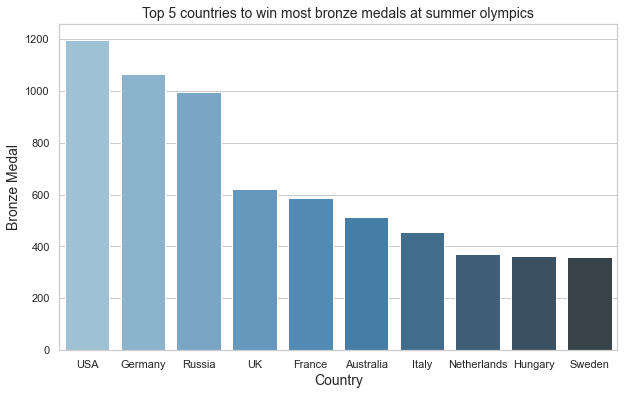

In [144]:
plt.subplots(figsize= (10, 6))
sns.set_theme(style="whitegrid")
bx=sns.barplot(x='index',y='Bronze Medal',data=BronzeMedalCountries, palette="Blues_d")
plt.title('Top 5 countries to win most bronze medals at summer olympics' , size = 14 )
plt.ylabel( "Bronze Medal" , size = 14 )
plt.xlabel( "Country" , size = 14 )

Top 10 most decorated olympic athletes at summer olympic season

In [33]:
summerOly = medals[medals['Season'] == 'Summer']
summerOly[['Name','Sex','region','Sport']].value_counts().reset_index(name='Medal').head(10)

,Name,Sex,region,Sport,Medal
0,"Michael Fred Phelps, II",M,USA,Swimming,28
1,Larysa Semenivna Latynina (Diriy-),F,Russia,Gymnastics,18
2,Nikolay Yefimovich Andrianov,M,Russia,Gymnastics,15
3,Borys Anfiyanovych Shakhlin,M,Russia,Gymnastics,13
4,Edoardo Mangiarotti,M,Italy,Fencing,13
5,Takashi Ono,M,Japan,Gymnastics,13
6,"Dara Grace Torres (-Hoffman, -Minas)",F,USA,Swimming,12
7,Birgit Fischer-Schmidt,F,Germany,Canoeing,12
8,Natalie Anne Coughlin (-Hall),F,USA,Swimming,12
9,Sawao Kato,M,Japan,Gymnastics,12


Top 10 most decorated olympic athletes at winter olympic season

In [146]:
winterOly = medals[medals['Season'] == 'Winter']
winterOly[['Name','Sex','region','Sport']].value_counts().reset_index(name='Medal').head(10)

,Name,Sex,region,Sport,Medal
0,Ole Einar Bjrndalen,M,Norway,Biathlon,13
1,Raisa Petrovna Smetanina,F,Russia,Cross Country Skiing,10
2,Yang Yang,F,China,Short Track Speed Skating,10
3,Stefania Belmondo,F,Italy,Cross Country Skiing,10
4,Marit Bjrgen,F,Norway,Cross Country Skiing,10
5,Claudia Pechstein,F,Germany,Speed Skating,9
6,Edy Sixten Jernberg,M,Sweden,Cross Country Skiing,9
7,"Ursula ""Uschi"" Disl",F,Germany,Biathlon,9
8,Lyubov Ivanovna Yegorova,F,Russia,Cross Country Skiing,9
9,Sven Fischer,M,Germany,Biathlon,8


Following are the summer olmypic games host cities

In [34]:
summerOly['City'].unique().tolist()

['Paris',
 'Antwerpen',
 'London',
 'Helsinki',
 'Beijing',
 'Seoul',
 'Atlanta',
 'Stockholm',
 'Melbourne',
 'Rio de Janeiro',
 'Sydney',
 'Athina',
 'Moskva',
 'Los Angeles',
 'Barcelona',
 'Berlin',
 'Roma',
 'Tokyo',
 'Munich',
 'St. Louis',
 'Montreal',
 'Amsterdam',
 'Mexico City']

Following are the winter olmypic games host cities

In [36]:
winterOly['City'].unique().tolist()

['Sochi',
 'Albertville',
 'Lillehammer',
 'Salt Lake City',
 'Torino',
 'Oslo',
 'Squaw Valley',
 'Chamonix',
 'Sankt Moritz',
 'Calgary',
 'Grenoble',
 'Vancouver',
 'Sapporo',
 'Lake Placid',
 'Sarajevo',
 'Garmisch-Partenkirchen',
 'Nagano',
 "Cortina d'Ampezzo",
 'Innsbruck']

Now let's do observation in variation of age of all athlete who have played summer olmypic. For this we are creating another dataframe where only Summer season is included

In [35]:
summer = df[df['Season']=='Summer']
summer['Season'].unique()

array(['Summer'], dtype=object)

In [38]:
summer['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

<AxesSubplot:title={'center':'Co-relation of Age of smmer olympic athletes per olympic games'}, xlabel='Year', ylabel='Age'>

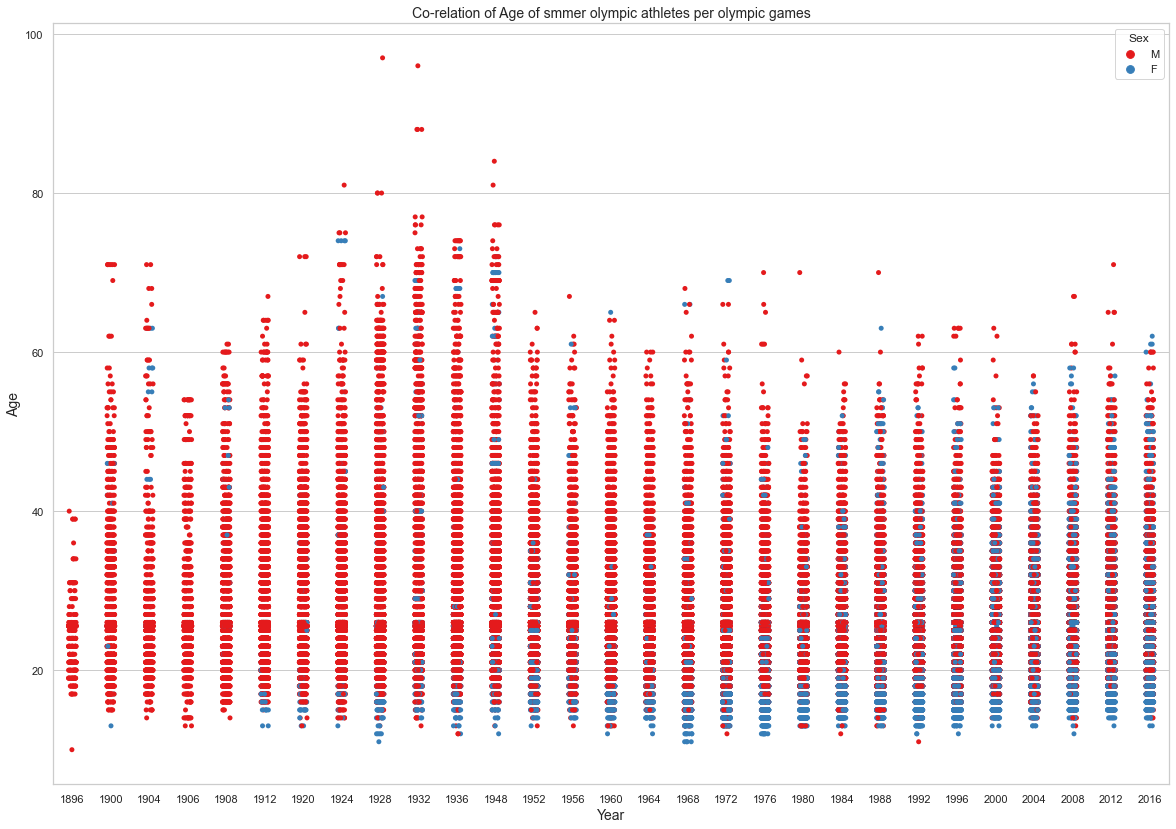

In [40]:
plt.figure(figsize=(20, 14))
plt.title('Co-relation of Age of smmer olympic athletes per olympic games' , size = 14 )
plt.ylabel( "Age" , size = 14 )
plt.xlabel( "Year" , size = 14 )
sns.set_theme(style="whitegrid")
sns.stripplot(x="Year", y="Age", data=summer,jitter=True,hue='Sex',palette='Set1')

Further Exploration scope : 
1. We can observe that in year 1928, 1932, 1936 & 1948 some athletes have age high as 90 & above. So let's discover their in which sport & event they took part in

2. Let's search for oldest athlete to win an olympic medal & a gold medal
3. From year 2000 to 2016 there is significant rise in Female participation - Female participation trend is explorable further

In [41]:
summer[summer['Age'] > 80].sort_values('Age', ascending=False).head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
257054,128719,John Quincy Adams Ward,M,97.0,25.556898,25.556898,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA
98118,49663,Winslow Homer,M,96.0,25.556898,25.556898,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA
60861,31173,Thomas Cowperthwait Eakins,M,88.0,25.556898,25.556898,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA


In above results - I never had an Idea about this that creative arts like - Sculpturing, Painting also have been a part of summer olmypic games

Now again we have not achieved the desired results of digging the details of oldest athlete, as Art Competitions have been discontinued long back, so far this let's plot one more stripplot visualization for athletes whom have won an olympic medal. For this criteria we already have created a dataframe named summerOly

In [44]:
summerOly['Season'].unique()

array(['Summer'], dtype=object)

In [43]:
summerOly['Medal'].unique()

array(['Gold', 'Bronze', 'Silver'], dtype=object)

In below results we can see that some athletes with age 60 & above also have won an olmypic medal - so let's explore their details like - event, sport, country they belonged to & other things like summer olympic year

Text(0.5, 0, 'Year')

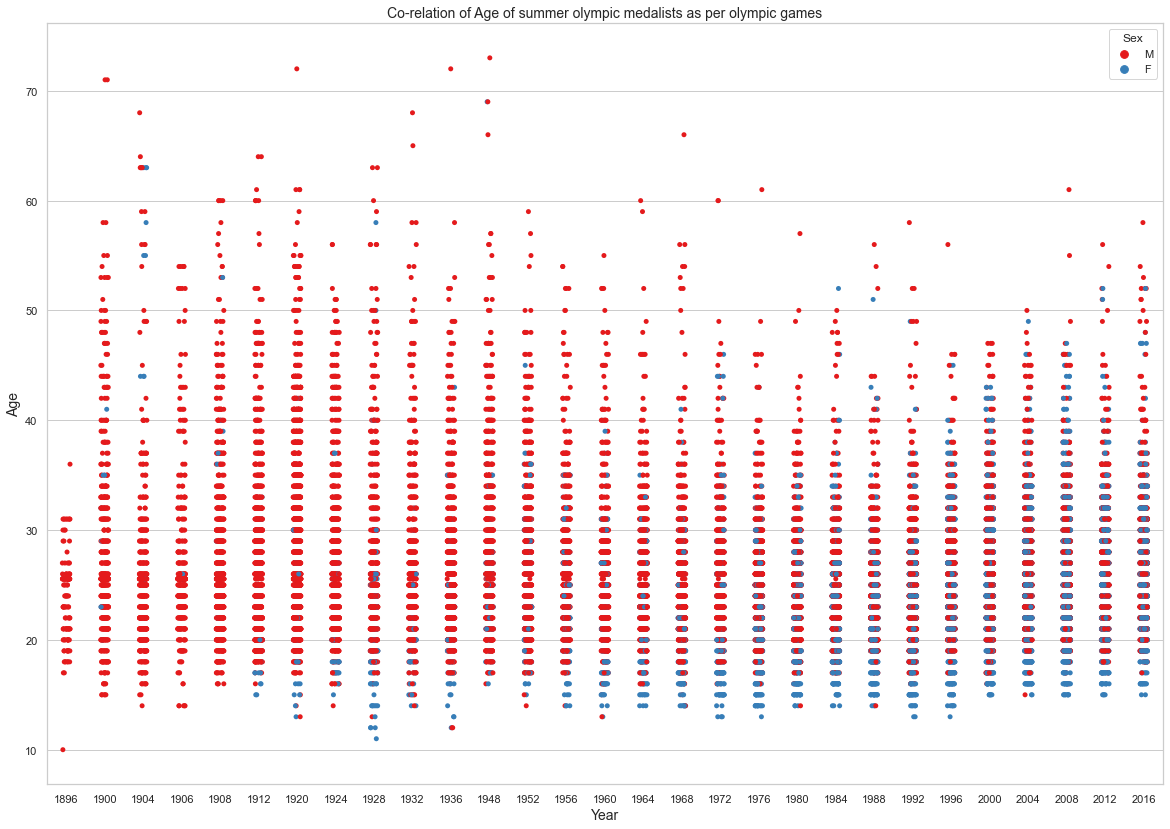

In [42]:
plt.figure(figsize=(20, 14))
sns.set_theme(style="whitegrid")
sns.stripplot(x="Year", y="Age", data=summerOly,jitter=True,hue='Sex',palette='Set1')
plt.title('Co-relation of Age of summer olympic medalists as per olympic games' , size = 14 )
plt.ylabel( "Age" , size = 14 )
plt.xlabel( "Year" , size = 14 )

In below results we can see that - Charles William Martin from France is an oldest athlete to win an olympic medal. And his age at time of winning an olympic was 71 years old. This is super impressive. And now let's explore the oldest athlete to win an olympic gold 

In [45]:
summerOly[summerOly['Age'] > 60].sort_values('Year',ascending=True).head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
150756,75648,Charles William Martin,M,71.0,25.556898,25.556898,Crabe II-4,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Bronze,France
150755,75648,Charles William Martin,M,71.0,25.556898,25.556898,Crabe II-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Silver,France
261102,130662,"Robert W. Williams, Jr.",M,63.0,25.556898,25.556898,Potomac Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA
261100,130662,"Robert W. Williams, Jr.",M,63.0,25.556898,25.556898,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Double American Round,Silver,USA
60403,30932,Samuel Harding Duvall,M,68.0,25.556898,25.556898,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Silver,USA


So we got 2 results for oldest athlete to win an olmypic gold. But Roque Sport is not longer played in recent modern olympic games, it was discontinued long back from the list of olympic sport. so in this case Oscar Gomer Swahn is an oldest athlete to win an olmypic gold medal

In [46]:
summerOly[(summerOly['Age']>60) & (summerOly['Medal'] == 'Gold')].sort_values('Age',ascending=False).head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
105199,53238,Charles Jacobus,M,64.0,25.556898,25.556898,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold,USA
233390,117046,Oscar Gomer Swahn,M,64.0,25.556898,25.556898,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden


Following are the events where Oscar Gomer Swahn participated in olympic events & in some he won medals

In [47]:
df[df['Name'] == 'Oscar Gomer Swahn'].sort_values('Age', ascending=True)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
233386,117046,Oscar Gomer Swahn,M,60.0,25.556898,25.556898,Sweden,SWE,1908 Summer,1908,Summer,London,Shooting,"Shooting Men's Running Target, Single Shot",Gold,Sweden
233387,117046,Oscar Gomer Swahn,M,60.0,25.556898,25.556898,Sweden,SWE,1908 Summer,1908,Summer,London,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden
233388,117046,Oscar Gomer Swahn,M,60.0,25.556898,25.556898,Sweden,SWE,1908 Summer,1908,Summer,London,Shooting,"Shooting Men's Running Target, Double Shot",Bronze,Sweden
233389,117046,Oscar Gomer Swahn,M,64.0,25.556898,25.556898,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot",NaN,Sweden
233390,117046,Oscar Gomer Swahn,M,64.0,25.556898,25.556898,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden
233391,117046,Oscar Gomer Swahn,M,64.0,25.556898,25.556898,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Double Shot",Bronze,Sweden
233392,117046,Oscar Gomer Swahn,M,64.0,25.556898,25.556898,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,Shooting Men's Trap,NaN,Sweden
233393,117046,Oscar Gomer Swahn,M,72.0,25.556898,25.556898,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Single Shot",NaN,Sweden
233394,117046,Oscar Gomer Swahn,M,72.0,25.556898,25.556898,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Single Shot, Team",NaN,Sweden
233395,117046,Oscar Gomer Swahn,M,72.0,25.556898,25.556898,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Double Shot, Team",Silver,Sweden


Now let's search for youngest female win olympic gold medal. The spot for youngest female olympic athlete is shared between 4 people

In [48]:
summerOly[(summerOly['Sex'] == 'F') 
          & (summerOly['Age'] < 14)
          & (summerOly['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
52010,26731,Donna Elizabeth de Varona (-Pinto),F,13.0,168.000000,61.000000,United States,USA,1960 Summer,1960,Summer,Roma,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA
73581,37398,Fu Mingxia,F,13.0,160.000000,48.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Diving,Diving Women's Platform,Gold,China
78544,39866,Marjorie Gestring (-Redlick),F,13.0,25.556898,25.556898,United States,USA,1936 Summer,1936,Summer,Berlin,Diving,Diving Women's Springboard,Gold,USA
200704,100797,Aileen Muriel Riggin (-Soule),F,13.0,142.000000,25.556898,United States,USA,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Springboard,Gold,USA


Here we are show co-relation & variation of height & weight of all olympic athletes using scatter plot. Here we are only considering the athletes which have height & weight caring not null values. That's why we created a new dataframe named hw.

In [49]:
hw = athlete[(athlete['Height'].notnull()) & (athlete['Weight'].notnull())] 
hw.isnull().sum()

ID             0
Name           0
Sex            0
Age          688
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     176657
dtype: int64

<AxesSubplot:title={'center':'Weight & Height co-relation of olympic athletes'}, xlabel='Height', ylabel='Weight'>

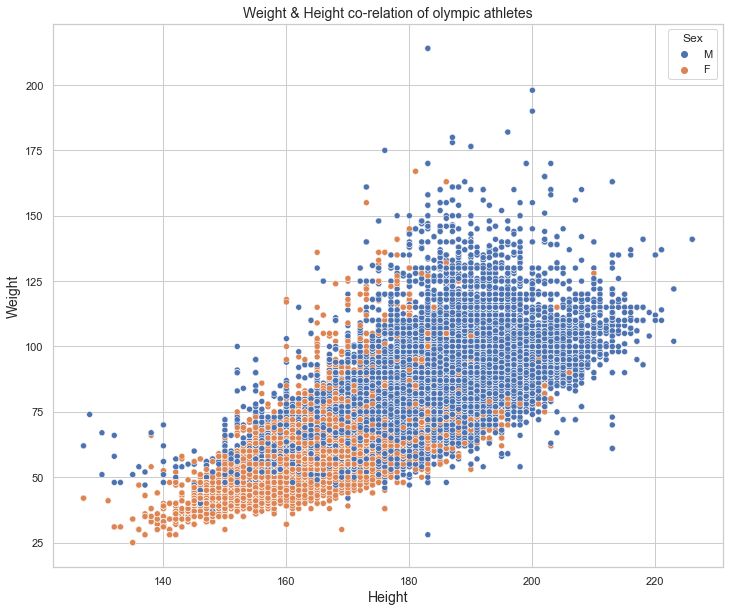

In [50]:
plt.figure(figsize=(12, 10))
plt.title('Weight & Height co-relation of olympic athletes' , size = 14 )
plt.ylabel( "Weight" , size = 14 )
plt.xlabel( "Height" , size = 14 )
sns.scatterplot(data=hw, x="Height", y="Weight", hue="Sex")

Here in above scatterplot Visualization we can see that some athletes have Height above 220 cm, while some athletes have weight more than 200 kg. So let's discover who they are what sport,event they all play

Great all of them are Basketball players, as in general Basketball athletes are tall as usual

In [51]:
hw[hw['Height'] > 220].sort_values('Height', ascending=False).head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN
32376,16639,Tommy Loren Burleson,M,20.0,223.0,102.0,United States,USA,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver
207373,104059,Arvydas Romas Sabonis,M,23.0,223.0,122.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold


In [52]:
hw[hw['Weight'] > 200].sort_values('Weight',ascending=False).head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN
23156,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN


Now let's explore the participation trend in summer olympic games for Male athletes

In [55]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [56]:
df['Season'].unique()

array(['Summer', 'Winter'], dtype=object)

In [57]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [58]:
summerOlyMale = df[(df['Season'] == 'Summer') & (df['Sex'] == 'M')]
summerOlyMale['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [59]:
summerOlyMale_count = summerOlyMale.groupby('Year').count()['ID'].reset_index()
summerOlyMale_count.head(5)

,Year,ID
0,1896,380
1,1900,1903
2,1904,1285
3,1906,1722
4,1908,3054


<AxesSubplot:title={'center':'Male athletes over years '}, xlabel='Year', ylabel='Male athlete count'>

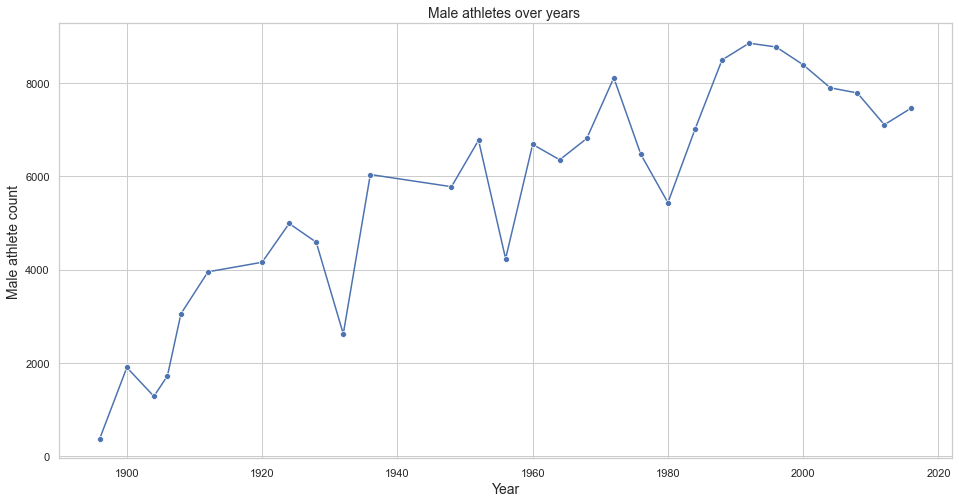

In [60]:
plt.figure(figsize=(16, 8))
plt.title( "Male athletes over years " , size = 14 )
plt.xlabel( "Year" , size = 14 )
plt.ylabel( "Male athlete count" , size = 14 )
sns.lineplot(data=summerOlyMale_count, x="Year", y="ID",marker='o', ci=68)

Female let's explore the participation trend in summer olympic games for female athletes

In [61]:
summerOlyFemale = df[(df['Season'] == 'Summer') & (df['Sex'] == 'F')]
summerOlyFemale['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [62]:
summerOlyFemale['Season'].unique()

array(['Summer'], dtype=object)

In [63]:
summerOlyFemale['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [64]:
summerOlyFemale_count = summerOlyFemale.groupby('Year').count()['ID'].reset_index()
summerOlyFemale_count.head(5)

,Year,ID
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


<AxesSubplot:title={'center':'Female athletes over years '}, xlabel='Year', ylabel='Female athlete count'>

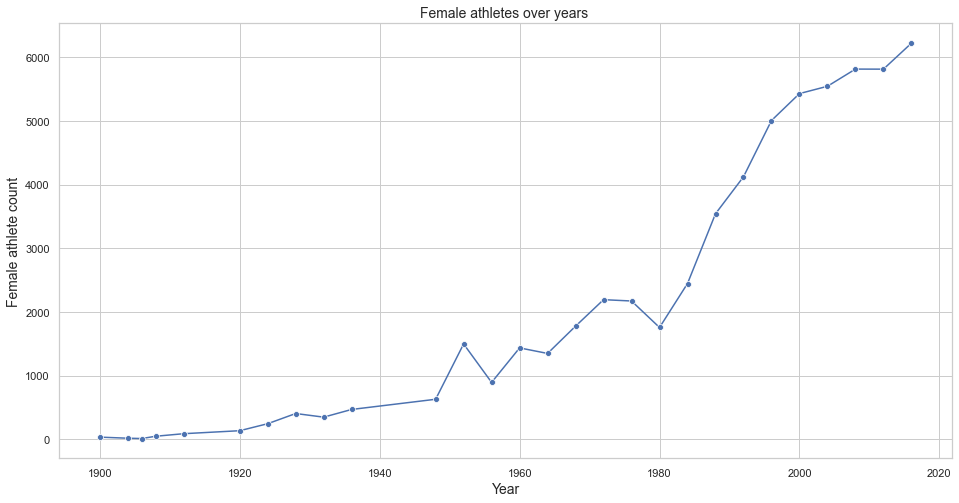

In [66]:
plt.figure(figsize=(16, 8))
plt.title( "Female athletes over years " , size = 14 )
plt.xlabel( "Year" , size = 14 )
plt.ylabel( "Female athlete count" , size = 14 )
sns.lineplot(data=summerOlyFemale_count, x="Year", y="ID", ci=68, marker='o')

Latvia at Summer Olympics

In [67]:
summer['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [68]:
summer['Weight'].isnull().sum()

0

In [77]:
summer['Season'].unique()

array(['Summer'], dtype=object)

In [70]:
summer['Height'].isnull().sum()

0

In [71]:
summer['Medal'].isnull().sum()

188464

In [72]:
latAtOly = summer[summer['region'] == 'Latvia']

<AxesSubplot:title={'center':'Heatmap visualizing null values in latAtOly dataframe'}>

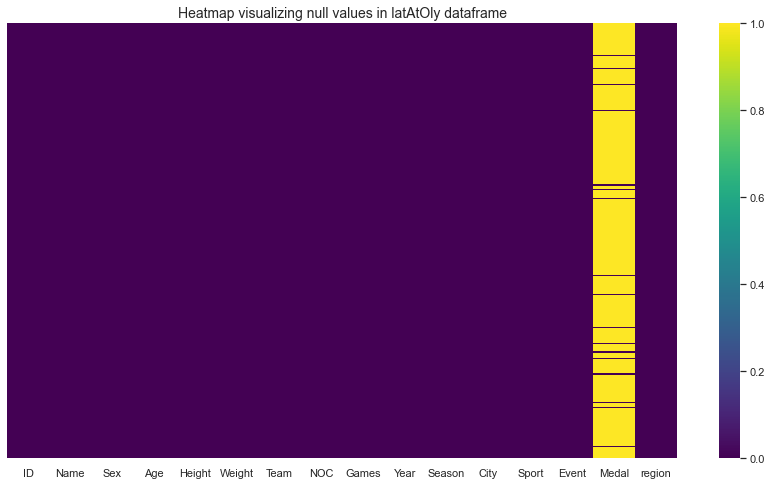

In [74]:
plt.subplots(figsize= (15, 8))
plt.title( "Heatmap visualizing null values in latAtOly dataframe" , size = 14 )
sns.heatmap(latAtOly.isnull(),yticklabels=False, cmap='viridis')

Now let's find out in which all sports & events Latvia has won most olympic medals.

In [78]:
latAtOly['Event'].value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,"Cycling Men's Road Race, Individual",24
1,Athletics Men's Javelin Throw,16
2,Athletics Men's 50 kilometres Walk,14
3,Basketball Women's Basketball,12
4,Football Men's Football,11


Following are the Sports where Latvia has won a olympic medals

In [79]:
latOlyMedals = latAtOly['Sport'].value_counts().reset_index(name='Medal').head(5)
latOlyMedals

,index,Medal
0,Athletics,146
1,Cycling,62
2,Swimming,29
3,Gymnastics,28
4,Art Competitions,24


Text(0.5, 0, 'Medals')

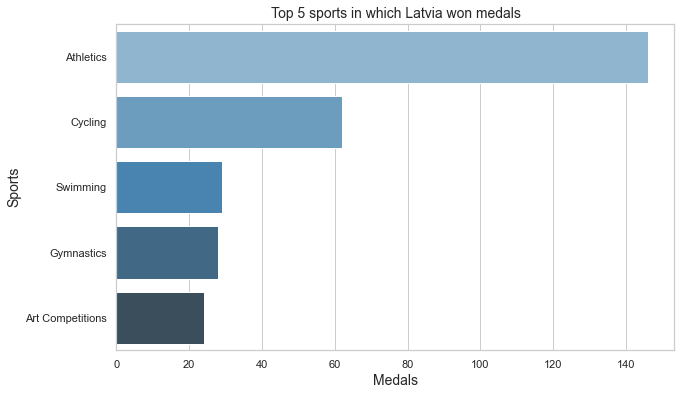

In [80]:
plt.subplots(figsize= (10, 6))
sns.set_theme(style="whitegrid")
lx=sns.barplot(x='Medal',y='index',data=latOlyMedals,   palette="Blues_d")
plt.title('Top 5 sports in which Latvia won medals' , size = 14 )
plt.ylabel( "Sports" , size = 14 )
plt.xlabel( "Medals" , size = 14 )

In [81]:
Lathw = latAtOly[(latAtOly['Height'].notnull()) & (latAtOly['Weight'].notnull())] 
Lathw.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height      0
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal     433
region      0
dtype: int64

Here we are show co-relation & variation of height & weight of Latvian olympic athletes using scatter plot.

<AxesSubplot:title={'center':'Weight & Height co-relation of olympic athletes from Latvia'}, xlabel='Height', ylabel='Weight'>

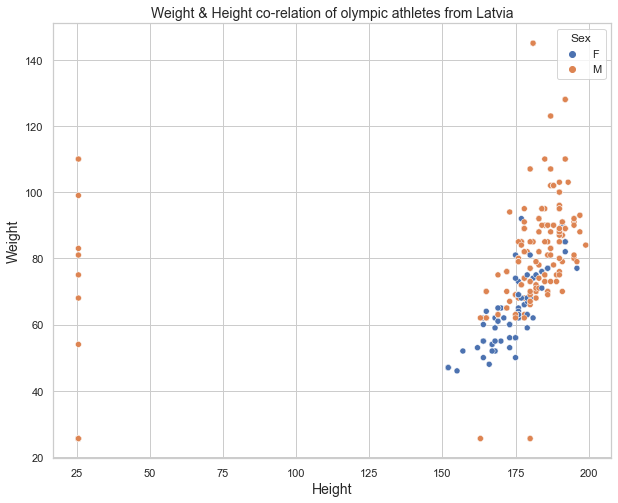

In [82]:
plt.figure(figsize=(10, 8))
plt.title('Weight & Height co-relation of olympic athletes from Latvia' , size = 14 )
plt.ylabel( "Weight" , size = 14 )
plt.xlabel( "Height" , size = 14 )
sns.scatterplot(data=Lathw, x="Height", y="Weight", hue="Sex")

Now let's explore the participation trend in summer olympic games for Latvian male athletes

In [83]:
latAtOly_Male = latAtOly[latAtOly['Sex'] == 'M']

In [85]:
latAtOly_Male['Medal'].unique()

array([nan, 'Silver', 'Bronze', 'Gold'], dtype=object)

In [86]:
latAtOly_Malecount =latAtOly_Male.groupby('Year').count()['ID'].reset_index()
latAtOly_Malecount.head(10)

,Year,ID
0,1924,47
1,1928,22
2,1932,13
3,1936,33
4,1992,29
5,1996,38
6,2000,43
7,2004,34
8,2008,35
9,2012,36


<AxesSubplot:title={'center':'Latvian male athletes over years'}, xlabel='Year', ylabel='Male athlete count'>

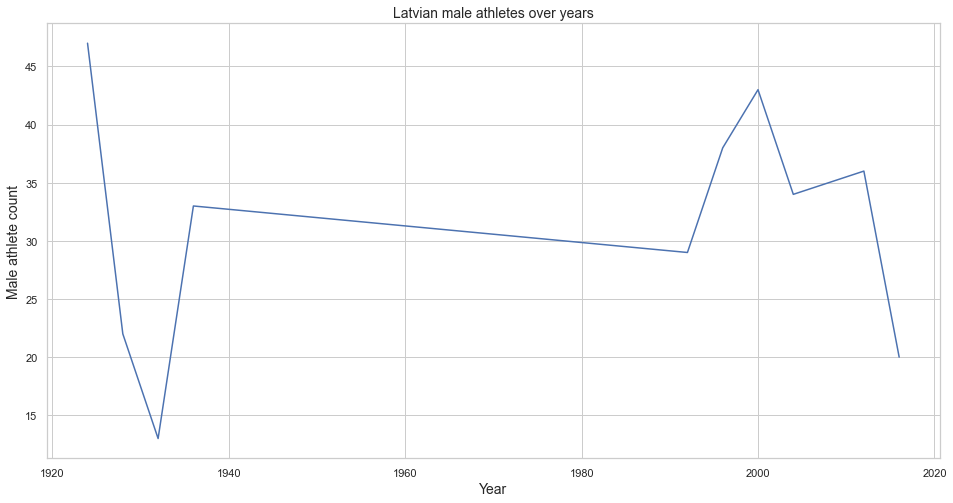

In [87]:
plt.figure(figsize=(16, 8))
plt.title( "Latvian male athletes over years" , size = 14 )
plt.xlabel( "Year" , size = 14 )
plt.ylabel( "Male athlete count" , size = 14 )
sns.lineplot(data=latAtOly_Malecount, x="Year", y="ID",err_style="bars", ci=68)

Now let's explore the participation trend in summer olympic games for Latvian female athletes

In [88]:
latAtOly_Female = latAtOly[latAtOly['Sex'] == 'F']

In [89]:
latAtOly_Femalecount =latAtOly_Female.groupby('Year').count()['ID'].reset_index()
latAtOly_Femalecount.head(10)

,Year,ID
0,1928,2
1,1992,11
2,1996,17
3,2000,17
4,2004,11
5,2008,18
6,2012,14
7,2016,13


<AxesSubplot:title={'center':'Latvian female athletes over years'}, xlabel='Year', ylabel='Female athlete count'>

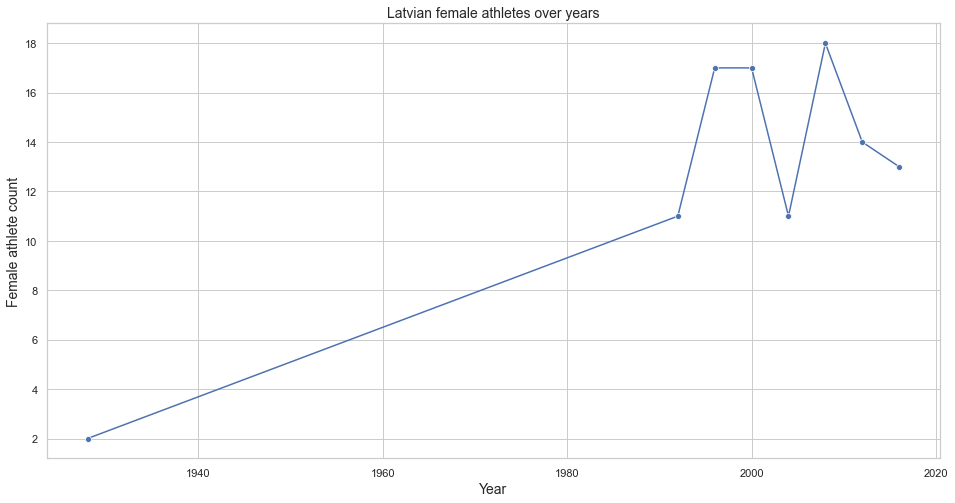

In [90]:
plt.figure(figsize=(16, 8))
plt.title( "Latvian female athletes over years" , size = 14 )
plt.xlabel( "Year" , size = 14 )
plt.ylabel( "Female athlete count" , size = 14 )
sns.lineplot(data=latAtOly_Femalecount, x="Year", y="ID",marker='o', ci=68)

Now let's explore trends in Shooting sports, for this we are creating a new dataframe called shooting

In [92]:
shooting = medals[medals['Sport'] == 'Shooting']
shooting.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
1472,818,Harry Lester Adams,M,31.000000,25.556898,25.556898,United States,USA,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Military Rifle, 200, 400, 500 a...",Gold,USA
1583,884,Eugene Addor,M,25.556898,25.556898,25.556898,Switzerland,SUI,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Rifle, 300 metres and ...",Bronze,Switzerland
2772,1540,Artur Surenovych Aivazian,M,35.000000,177.000000,88.000000,Ukraine,UKR,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",Gold,Ukraine


In [93]:
shooting['Event'].nunique()

82

Following are top 10 shooting sport athletes 

In [95]:
Top10Shooters = shooting[['Name','Sex','region','Sport']].value_counts().reset_index(name='Medal').head(10)
Top10Shooters

,Name,Sex,region,Sport,Medal
0,Carl Townsend Osburn,M,USA,Shooting,11
1,"Alfred Gomer Albert ""Alf"" Swahn",M,Sweden,Shooting,9
2,Gustaf Vilhelm Carlberg,M,Sweden,Shooting,8
3,Otto Martin Olsen,M,Norway,Shooting,8
4,Lon Ernest Moreaux,M,France,Shooting,7
5,Lloyd Spencer Spooner,M,USA,Shooting,7
6,Einar Liberg,M,Norway,Shooting,7
7,"Willis Augustus Lee, Jr.",M,USA,Shooting,7
8,Albert Helgerud (Thorvaldsen-),M,Norway,Shooting,7
9,Konrad Stheli,M,Switzerland,Shooting,6


Text(0.5, 0, 'Medals')

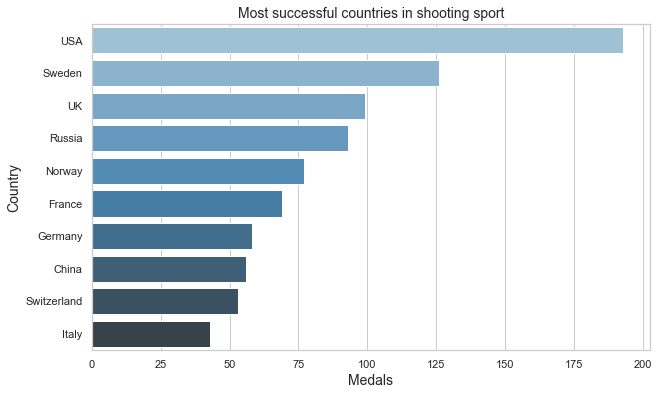

In [101]:
mostSuccessfulCountriesInShooting = shooting['region'].value_counts().reset_index(name='Medal').head(10)
plt.subplots(figsize= (10, 6))
sns.set_theme(style="whitegrid")
lx=sns.barplot(x='Medal',y='index',data=mostSuccessfulCountriesInShooting,   palette="Blues_d")
plt.title('Most successful countries in shooting sport' , size = 14 )
plt.ylabel( "Country" , size = 14 )
plt.xlabel( "Medals" , size = 14 )

<AxesSubplot:title={'center':'Weight & Height co-relation of shooting sport olympic medalists'}, xlabel='Height', ylabel='Weight'>

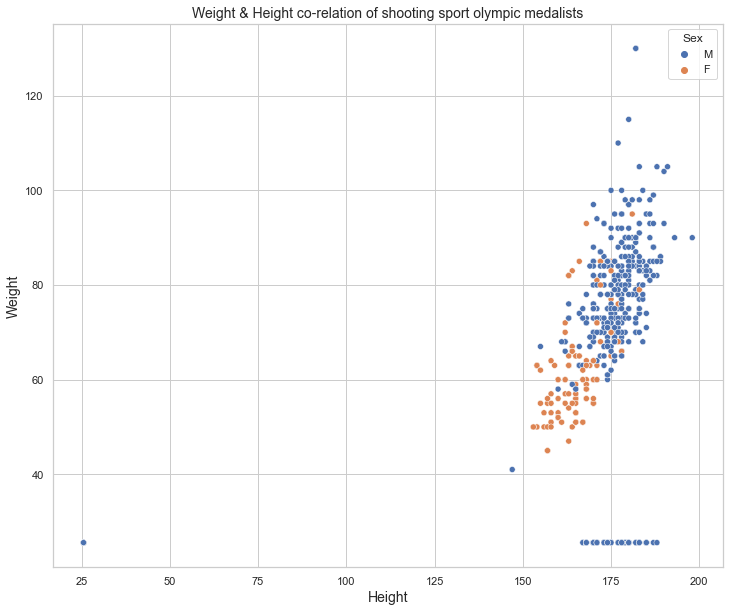

In [102]:
plt.figure(figsize=(12, 10))
plt.title('Weight & Height co-relation of shooting sport olympic medalists' , size = 14 )
plt.ylabel( "Weight" , size = 14 )
plt.xlabel( "Height" , size = 14 )
sns.scatterplot(data=shooting, x="Height", y="Weight", hue="Sex")

Here in above exploration - we can see that some male athlete is over 120 kg weight. Now let's search who they are - which country they belong, events, medal won by them.

In [103]:
shooting[shooting['Weight'] > 120].sort_values('Year',ascending=True).head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
100246,50715,"Konrad Walentin ""Konni"" Huber",M,31.0,182.0,130.0,Finland,FIN,1924 Summer,1924,Summer,Paris,Shooting,Shooting Men's Trap,Silver,Finland
100247,50715,"Konrad Walentin ""Konni"" Huber",M,31.0,182.0,130.0,Finland,FIN,1924 Summer,1924,Summer,Paris,Shooting,"Shooting Men's Trap, Team",Bronze,Finland


Thanks you have a nice day